# Chapter 7 - Principles of Data Visualization

So far you've learned several ways to visualize data - histograms, scatterplots, boxplots, etc. You've also learned how to make changes to those graphs like adjust color, data size, or faceting. Up to this point, you've made choices on exactly what to do with those options on your own (maybe according to your preferences, or whatever let you do the assignment most quickly). 

However, visualizations are a powerful way of not just understanding your data yourself, but also communicating about it to other people. Thus there are important principles to follow so that your audience will see the point you intend to make. 

## 7.1 The importance of good visualization

Here's a historic example of just how important it can be to visualize your data well. On January 28, 1986, the Space Shuttle Challenger exploded 73 seconds after takeoff, killing all 7 of the astronauts on board. As when any such disaster occurs, there was an official investigation into the cause of the accident, which found that an O-ring connecting two sections of the solid rocket booster leaked, resulting in failure of the joint and explosion of the large liquid fuel tank.

<img src="ch7-challenger.png" width="400">

The investigation found that many aspects of the NASA decision making process were flawed, and focused in particular on a meeting between NASA staff and engineers from Morton Thiokol, a contractor who built the solid rocket boosters. These engineers were particularly concerned because the temperatures were forecast to be very cold on the morning of the launch, and they had data from previous launches showing that performance of the O-rings was compromised at lower temperatures. In a meeting on the evening before the launch, the engineers presented their data to the NASA managers, but were unable to convince them to postpone the launch. Their evidence was a set of hand-written slides showing numbers from various past launches.

The visualization expert Edward Tufte has argued that with a proper presentation of all of the data, the engineers could have been much more persuasive. In particular, they could have shown a figure like the one below, which highlights two important facts. First, it shows that the amount of O-ring damage (defined by the amount of erosion and soot found outside the rings after the solid rocket boosters were retrieved from the ocean in previous flights) was closely related to the temperature at takeoff. Second, it shows that the range of forecasted temperatures for the morning of January 28 (shown in the red shaded area) was well outside of the range of all previous launches. While we can’t know for sure, it seems at least plausible that this could have been more persuasive.

<img src="ch7-challengerdamage.png" width="700">

## 7.2 Anatomy of a plot

The goal of plotting data is to present a summary of a dataset in a two-dimensional (or occasionally three-dimensional) presentation. We refer to the dimensions as axes – the horizontal axis is called the X-axis and the vertical axis is called the Y-axis. We can arrange the data along the axes in a way that highlights the data values. These values may be either continuous or categorical.

There are many different types of plots that we can use, which have different advantages and disadvantages. Let’s say that we are interested in characterizing the difference in height between men and women in the ```fingers``` dataset. The figure below shows four different ways to plot these data - some of these we discussed in the last chapter, and one is new.

<img src="ch7-plottypes.png" width="550">

Now we will begin to discuss *why* we should choose to use some of these over others. 

The bar graph in panel A shows the difference in means, but doesn’t show us how much spread there is in the data around these means – and as we will see later, knowing this is essential to determine whether we think the difference between the groups is large enough to be important.

The second panel B shows the bars with all of the data points overlaid - this makes it a bit clearer that the distributions of height for men and women are overlapping, but it’s still hard to see due to the large number of data points focused on one spot. 

In general we prefer using a plotting technique that provides a clearer view of the distribution of the data points. In panel C, we see one example of a **violin plot**, which plots the distribution of data in each condition (after smoothing it out a bit). Obviously, the name of this plot comes from the fact that it sort of resembles a violin shape. The fatter part of the "violin" is where there is more data, the skinnier parts are the tails of the distribution. You can make a plot like this in R using ```gf_violin()```. 

Another option is the boxplot shown in panel D, which shows the median (central line), a measure of variability (the width of the box, which is based on a measure called the interquartile range), and any outliers (noted by the points at the ends of the lines). Violin plots and boxplots are both effective ways to communicate the central tendency of each group as well as provide a good feel for the distribution of the data.

Let's explore the differences between making a boxplot and a violin plot. In the code window below, write a function that will plot ```Thumb``` explained by ```RaceEthnic``` from the ```fingers``` dataset, with colors varying by ```RaceEthnic```. 

In [ ]:
library(readr)
library(ggformula)

fingers <- read_csv('fingers.csv')

In [ ]:
#Write your code here for making a boxplot of Thumb ~ RaceEthnic, with varying colors


Now, simply replace ```gf_boxlplot``` with ```gf_violin```:

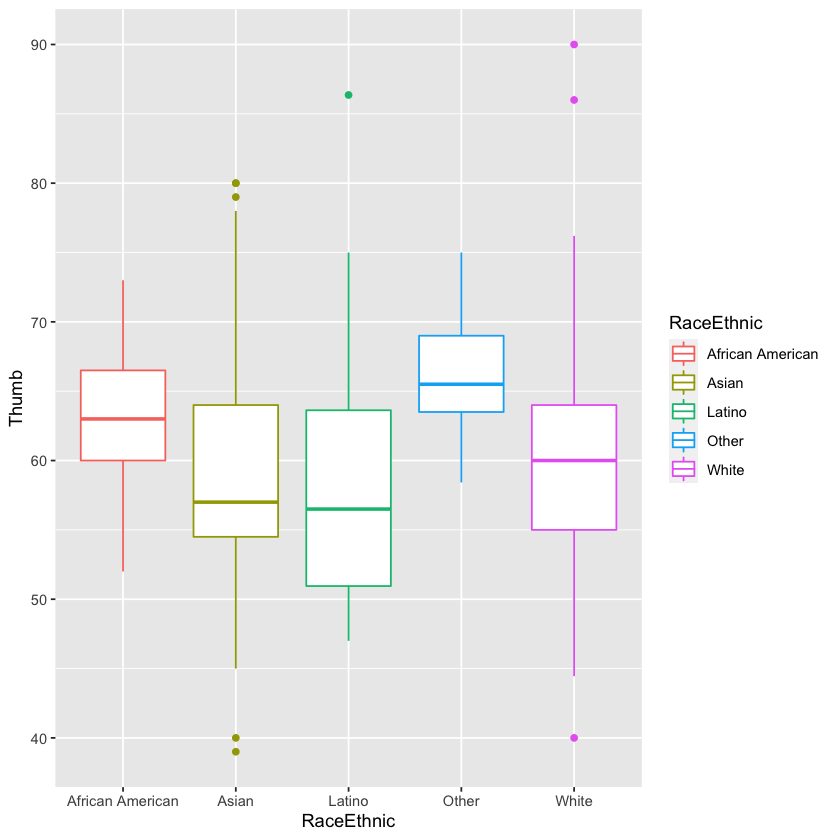

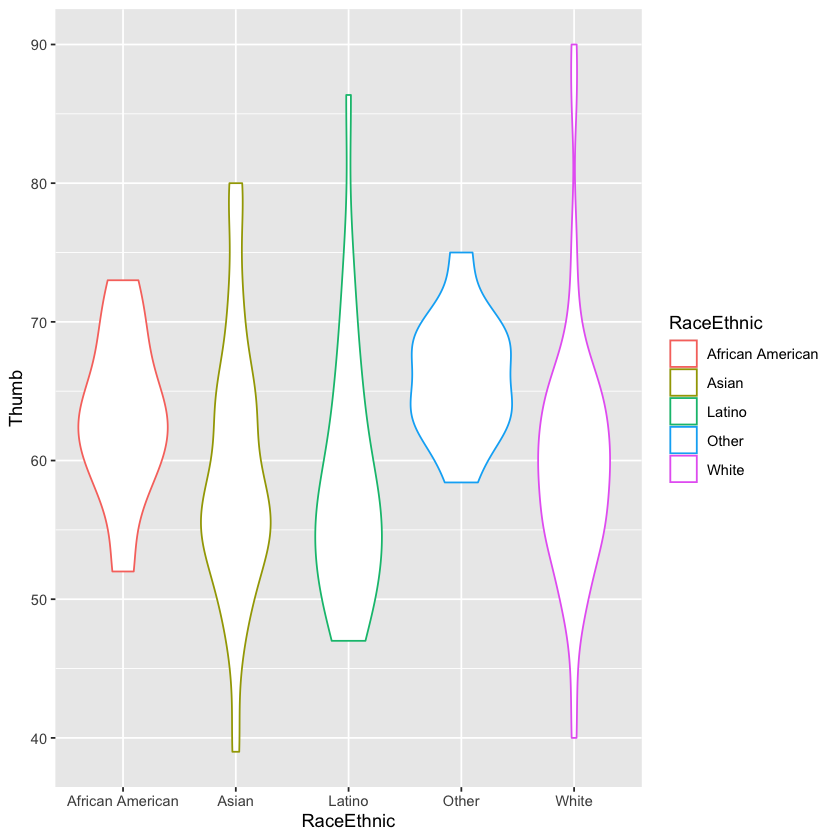

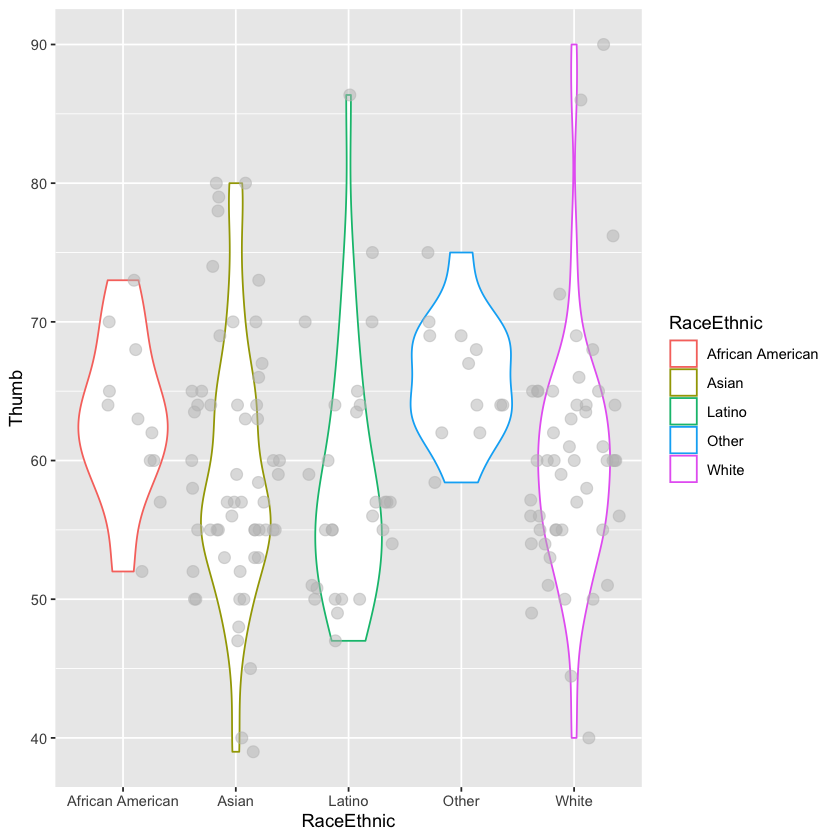

In [62]:
#Write your code here for making a violin plot of Thumb ~ RaceEthnic


What sort of information about the data is easier to see in a boxplot? What sort of information is easier to see in a violin plot?

## 7.3 Principles of good visualization

Many books have been written on effective visualization of data. There are some principles that most of these authors agree on, while others are more contentious. Here we summarize some of the major principles.

### Rule 1 - Show the data and make them stand out
Let’s say that you performed a study that examined the relationship between dental health and time spent flossing, and you would like to visualize the data. The figure below shows four possible presentations of these data.

<img src="ch7-dental.png" width="550">

In panel A, we don’t actually show the data, just a line expressing the relationship between the data. This line implies an explanatory relationship. It says that, for observations that have more flossing, we would expect better dental health. However, this plot is clearly not optimal, because we can’t actually see what the underlying data look like. We don't know if this relationship line actually reflects the dataset. 

Panels B-D show three possible outcomes from plotting the actual data, where each plot shows a different way that the data might have looked. If we saw the plot in Panel B, we would probably be suspicious – rarely would real data follow such a precise pattern. The data in Panel C, on the other hand, look like real data – they show a general trend, but they are messy, as data in the world usually are. The data in Panel D show us that the apparent relationship between the two variables is solely caused by one individual, who we would refer to as an outlier because they fall so far outside of the pattern of the rest of the group. It should be clear that we probably don’t want to conclude very much from a relationship that is driven by one data point. This figure highlights why it is always important to look at the raw data before putting too much faith in any summary of the data.

Below is a scatterplot of ```Middle``` varying by ```Sex```. The density of the distributions is pretty tight, so with this code it is hard to see all the datapoints. Make at least one change to the plot so that it is easier to see the data points. 

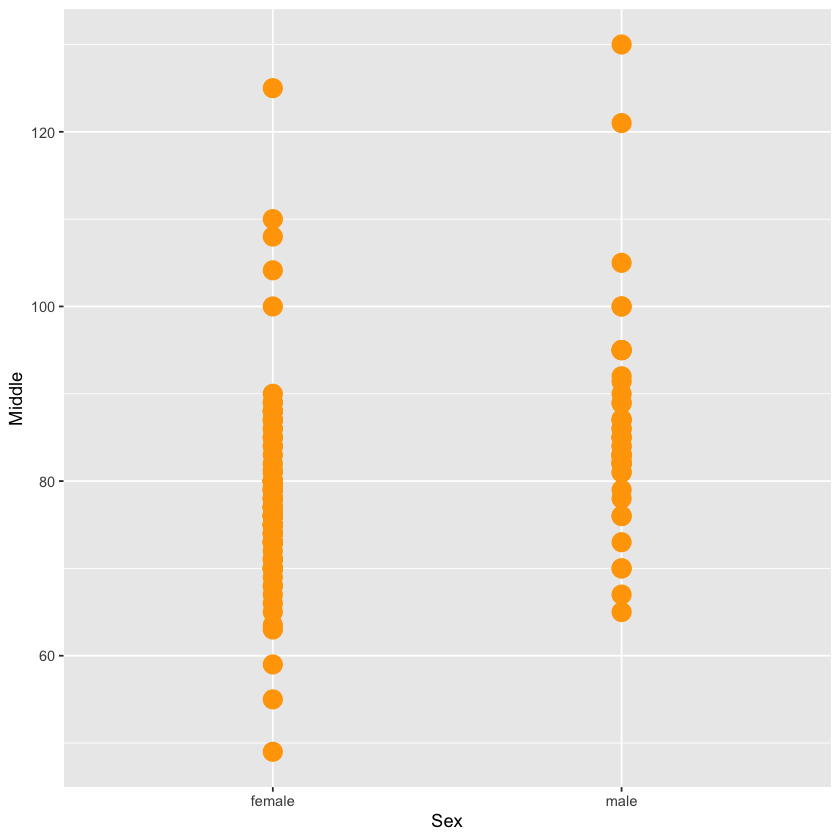

In [71]:
# Make at least one change to this plot to make the data stand out better
gf_point(Middle ~ Sex, data = fingers, color = "orange", size = 5) 


That's for making the raw data most evident. You also want your broader message to stand out - again, think about *why* you're showing people this graph. Are they understanding what you want them to understand? In the plot above, even if you changed it to a jitter plot, changed the point transparency, etc., it might still be hard to see from a glance where the central tendency of each group is, or which group is which. People can probably figure it out by looking harder, but in the real world we want things to be as cognitively easy for our readers as possible. 

Thus, it's good to choose plot styles and elements that highlight your main message. For this plot, we might be trying to say "male students have generally longer middle fingers than female students." This has two important pieces to communicate - the central tendency of a group, and the distinctness of the groups. It's a good rule of thumb that, when you have more than one group of data in a plot, that you change the color of the data to correspond to each group. In addition, if the central tendency is the main summary statistic you care about, choose a plot type that highlights that (such as a violin plot or a boxplot). 

Below is the same basic scatterplot. Try to switch it to a plot type that better communicates the central tendency, and change the group colors to be different. 

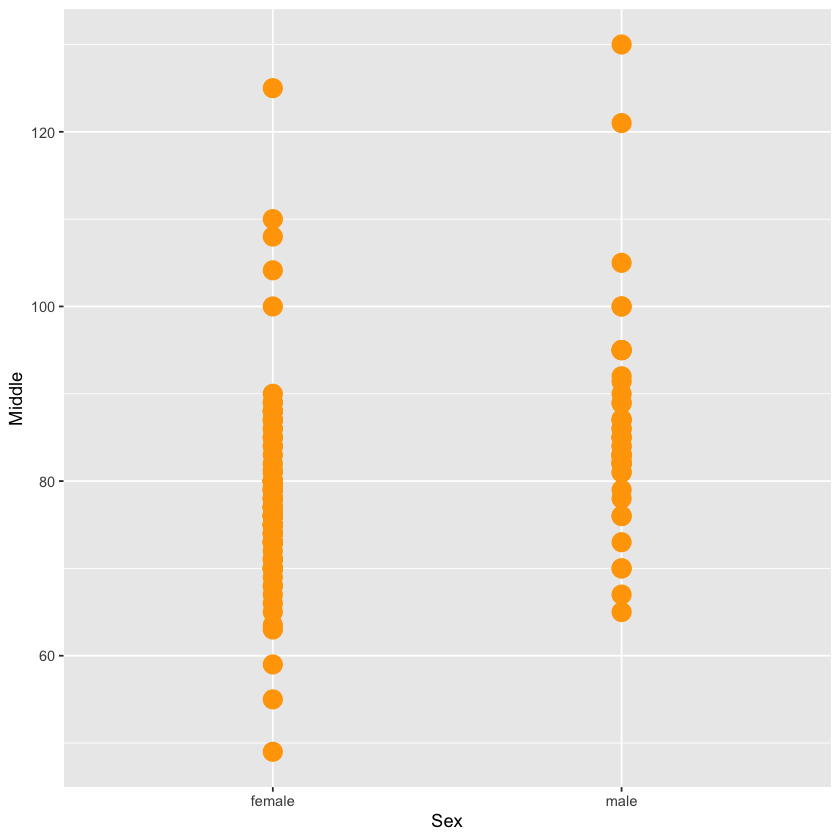

In [72]:
# Switch this to a better plot type, and make the group colors different
gf_point(Middle ~ Sex, data = fingers, color = "orange", size = 5) 


### Rule 2 - Maximize the data to ink ratio
Edward Tufte has proposed an idea called the data/ink ratio:

$$data/ink-ratio = \frac{ink-used-on-data}{total-ink-used}$$

Because we now do all our statistics with code, "ink" is maybe an anachronism - it could be better to say "pixels" now. But regardless, the point of this is to minimize visual clutter and let the data show through. For example, take the two presentations of the dental health data below. Both panels show the same data, but panel A is much easier to apprehend, because of its relatively higher data/ink ratio.

<img src="ch7-inkratio.png" width="750">

### Rule 3 - Avoid chart junk
It’s especially common to see presentations of data in the popular media that are adorned with lots of visual elements that are thematically related to the content but unrelated to the actual data. This is known as chart junk. It may seem like a cool thing to add, but it should be avoided at all costs.

One good way to avoid chart junk is to rely on the graphical plotting from programming languages like R, rather than manually adding fancy graphics. For example, the chart in Figure 4.6 (created using Microsoft Excel) plots the relative popularity of different religions in the United States. There are at least three things wrong with this figure:

- it has graphics overlaid on each of the bars that have nothing to do with the actual data
- it has a distracting background texture
- it uses three-dimensional bars, which distort the data

<img src="ch7-chartjunk.png" width="550">

### Rule 4 - Avoid distorting the data

It’s often possible to use visualization to distort the message of a dataset. A very common one is use of different axis scaling to either exaggerate or hide a pattern of data. For example, let’s say that we are interested in seeing whether rates of violent crime have changed in the US. In the below figure, we can see these data plotted in ways that either make it look like crime has remained constant, or that it has plummeted. The same data can tell two very different stories!

<img src="ch7-crime.png" width="700">

*data obtained [here](https://www.ucrdatatool.gov/Search/Crime/State/RunCrimeStatebyState.cfm)*

One of the major controversies in statistical data visualization is how to choose the Y axis, and in particular whether it should always include zero. In his famous book “How to lie with statistics”, Darrell Huff argued strongly that one should always include the zero point in the Y axis. On the other hand, Edward Tufte has argued against this. He asserts that one should not spend a lot of empty vertical space trying to reach down to the zero point at the cost of hiding what is going on in the data line itself.

There are certainly cases where using the zero point makes no sense at all. Let’s plot the ```Middle``` and ```Thumb``` variables from the ```fingers``` dataset in a scatterplot, with and without zero in the Y axis. We'll use the ```gf_refine()``` function again to refine the default scatterplot we make, but this time the second argument will be ```coord_cartesian()``` that gets applied to the plot, to explicitly define the axis limits. 


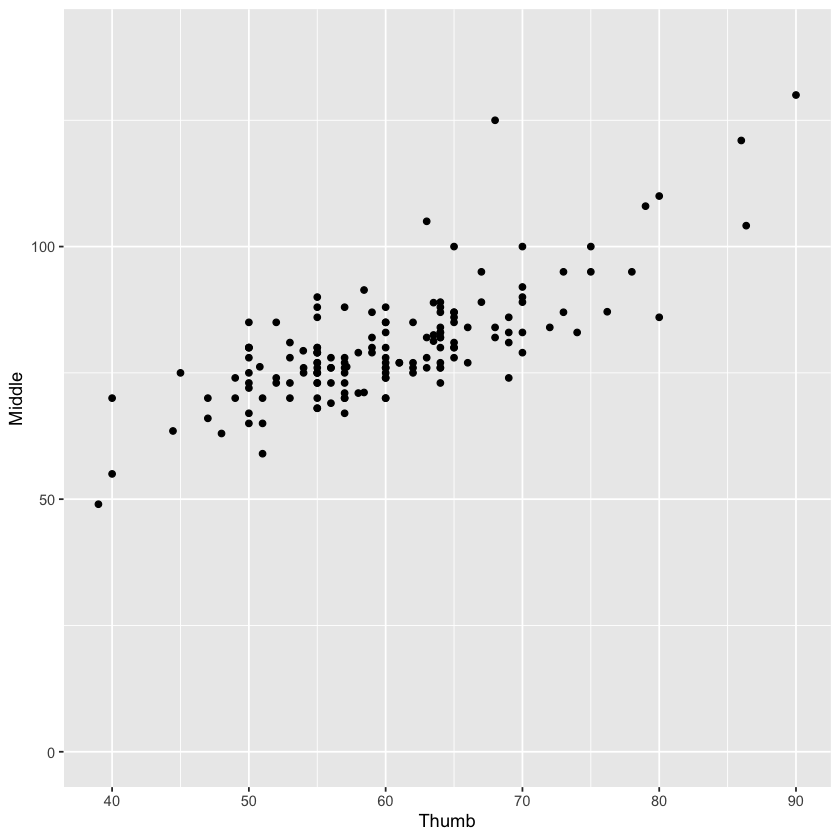

In [57]:
gf_point(Middle ~ Thumb, data=fingers) %>% 
    gf_refine(coord_cartesian(ylim=c(0,140))) #the argument ylim takes a vector defining the min and max of the axis

Plotting these data with zero in the y-axis wastes a lot of space in the figure, given that someone's finger length is very unlikely to be so short. By including zero, we are also squishing down the variance within ```Middle``` to make it look like ```Thumb``` explains more of it than we'd otherwise think. To make the problem even more evident, let's expand both the y-axis and x-axis to go from 0-200.

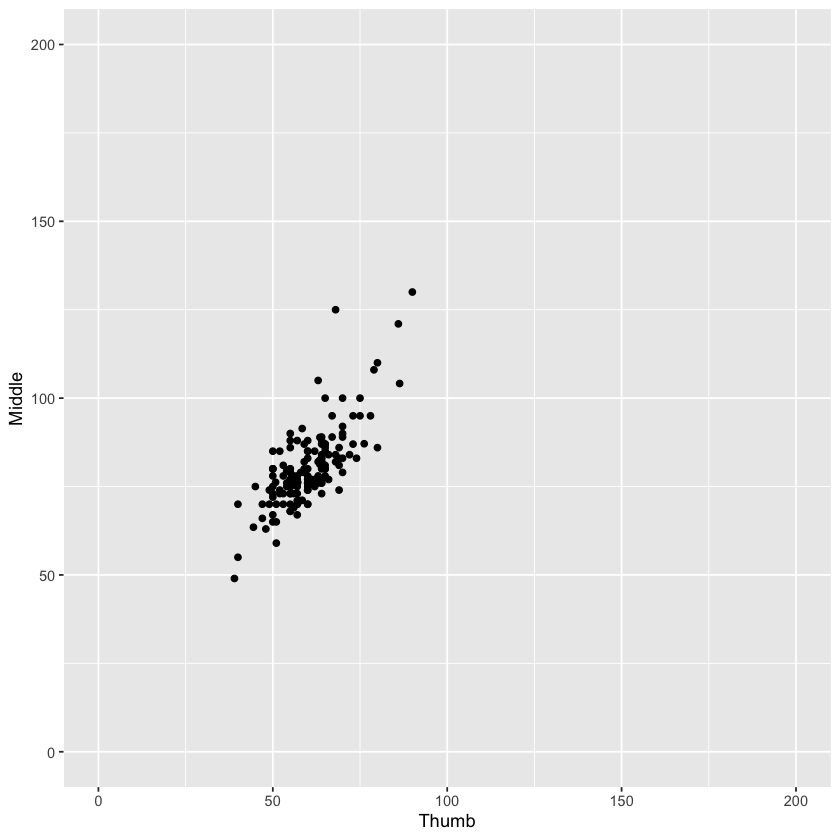

In [67]:
gf_point(Middle ~ Thumb, data=fingers) %>%
    gf_refine(coord_cartesian(ylim = c(0, 200), xlim = c(0,200))) 

We don't have much ability at all to see the variation in the data here, and there's a lot of wasted space around the data points. 

However, it can be manipulative to go in the other direction, and focus in on the axis scale so much that small differences in values look massive. Let's take a look at the number of students in the dataset that identify as Asian or White. First we'll filter down the dataset to focus on just those values in the variable ```RaceEthnic```, and then plot them in a bar plot. 

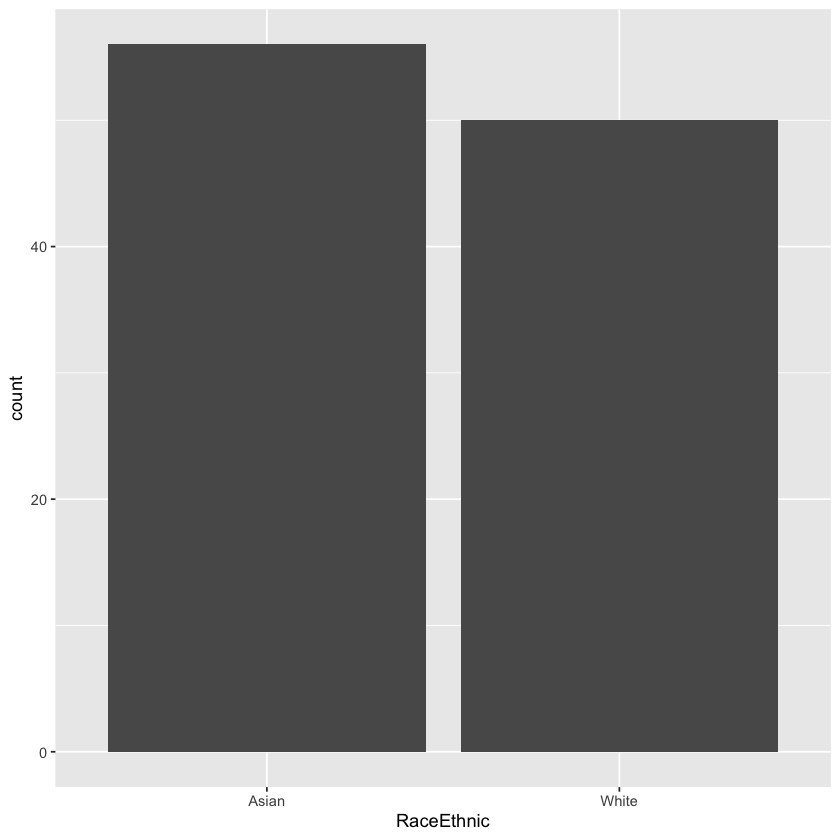

In [32]:
library(dplyr)

filter(fingers, RaceEthnic %in% c("Asian","White")) %>%
    gf_bar( ~ RaceEthnic, data= .)      #piping the filtered data to an argument in gf_bar that is not first,
                                        #so need to use a "." to tell the pipe where to put it

Based on the size of the bars, it looks like there are a fairly similar number of students with each ethnicity. However, we can make it look like there are many more Asian students than White students by changing the y-axis:

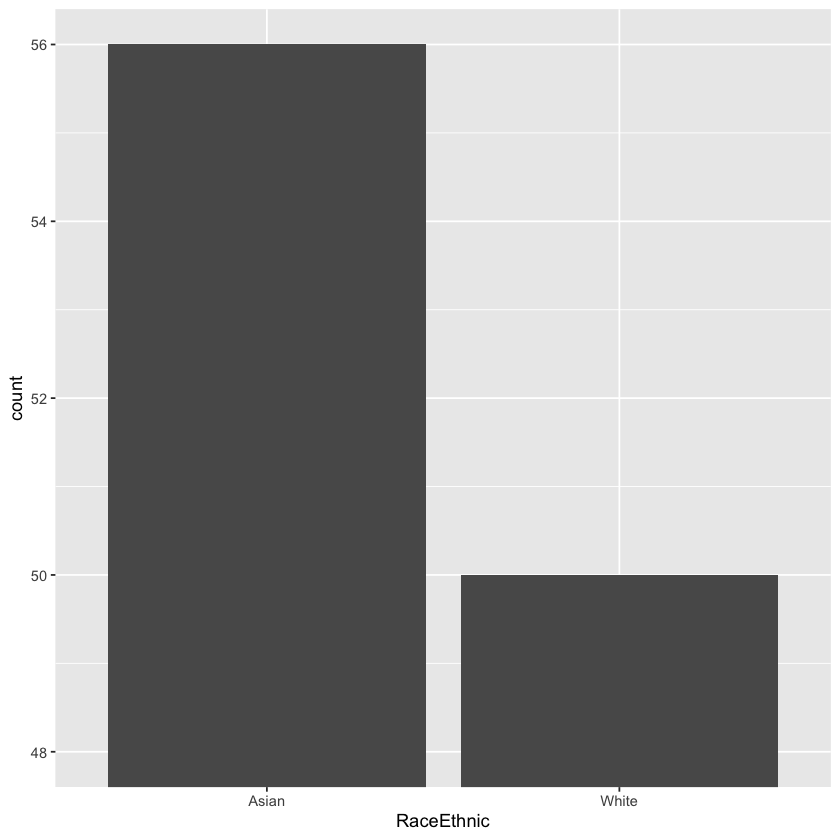

In [53]:
filter(fingers, RaceEthnic %in% c("Asian","White")) %>%
    gf_bar( ~ RaceEthnic, data= .) %>%
    gf_refine(coord_cartesian(ylim = c(48, 56)))


Of course, if we look at the y-axis values the actual difference in numbers doesn't change. But it's difficult to override our initial reaction to seeing differently-sized bars, so the first impression of this graph is "there are many more Asian students than White." 

To avoid wasting too much white space or misleading your audience by exaggerating differences, a good starting place is to use axis ranges that encompass the full range of your raw data but not much more. Then consider whether a larger range should be used based on what you're specifically trying to communicate.

### Rule 5 - Readable data labels

Often in datasets you work with, variables will be given shorthand names that make them easier to type in code. If you then use them to make a plot, that variable name will be used as the label on the axis:

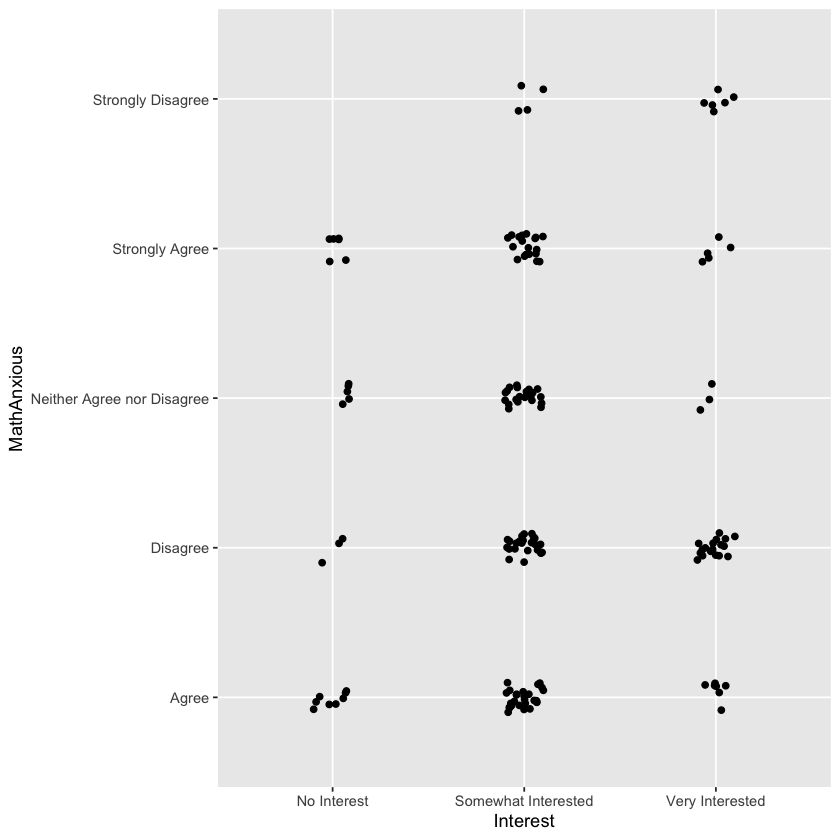

In [74]:
gf_jitter(MathAnxious ~ Interest, data=fingers, height=0.1, width=0.1)

In this graph, without knowing much about the study the data came from, can you be sure what "Interest" means? Even if you know this is a study of students in a statistics class, is it interest in the course? This less? Taking this survey? 

If you're writing a research paper with this data, someone could read the text elsewhere in your paper to know what the variable names mean, but why make them work so hard and risk them not understanding? It's important to label the axes in your plots with readable names that communicate important information about the variable by just looking at the image. 

Most ```ggformula``` functions let you change the axis labels for a plot via the arguments ```xlab``` and ```ylab```. These arguments take a string of text (in quotation marks) as the new axis label. Let's do that to make the x-axis in the above figure more understandable: 

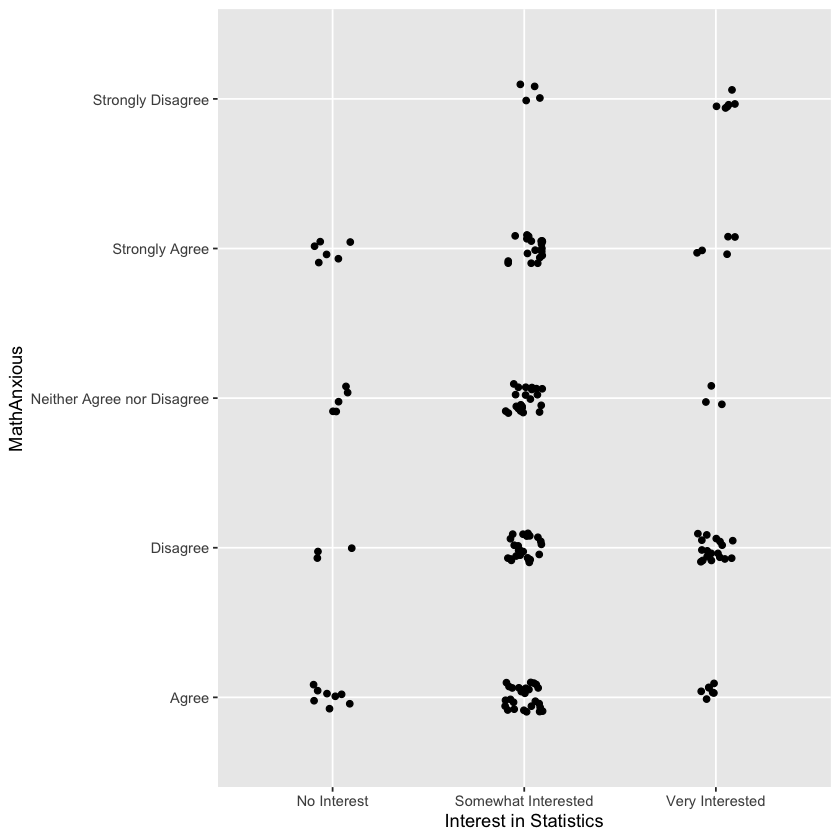

In [76]:
gf_jitter(MathAnxious ~ Interest, data=fingers, height=0.1, width=0.1, xlab = "Interest in Statistics")

We could also choose to update the y-axis: Someone can probably figure out what ```MathAnxious``` means, but it's not a word itself so it's not very professional. 

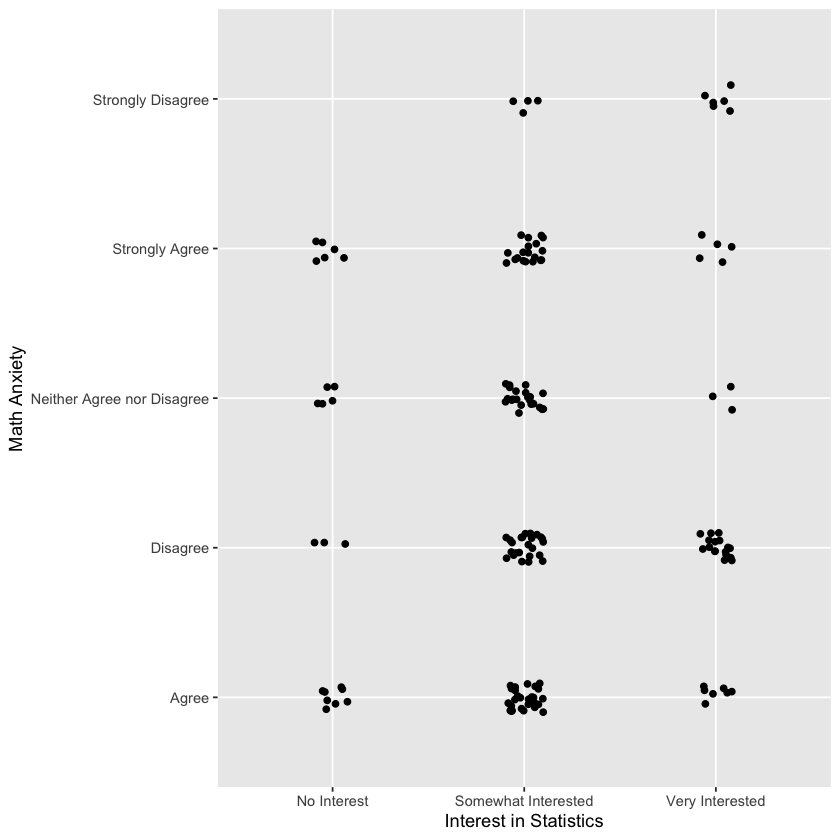

In [77]:
gf_jitter(MathAnxious ~ Interest, data=fingers, height=0.1, width=0.1, 
          xlab = "Interest in Statistics", ylab = "Math Anxiety")

There's also an argument for ```title``` to name the overall graph. Use it in the code below to give this graph a name of whatever you want: 

In [ ]:
gf_jitter(MathAnxious ~ Interest, data = fingers, height = 0.1, width = 0.1, 
          xlab = "Interest in Statistics", ylab = "Math Anxiety", title = #YOUR CODE HERE)

If you want even finer control over the axes and titles, there's another function called ```gf_labs()``` that, like ```gf_refine()```, can be chained on. Check out the code below, and try adjusting all the possible options for ```gf_labs()```.

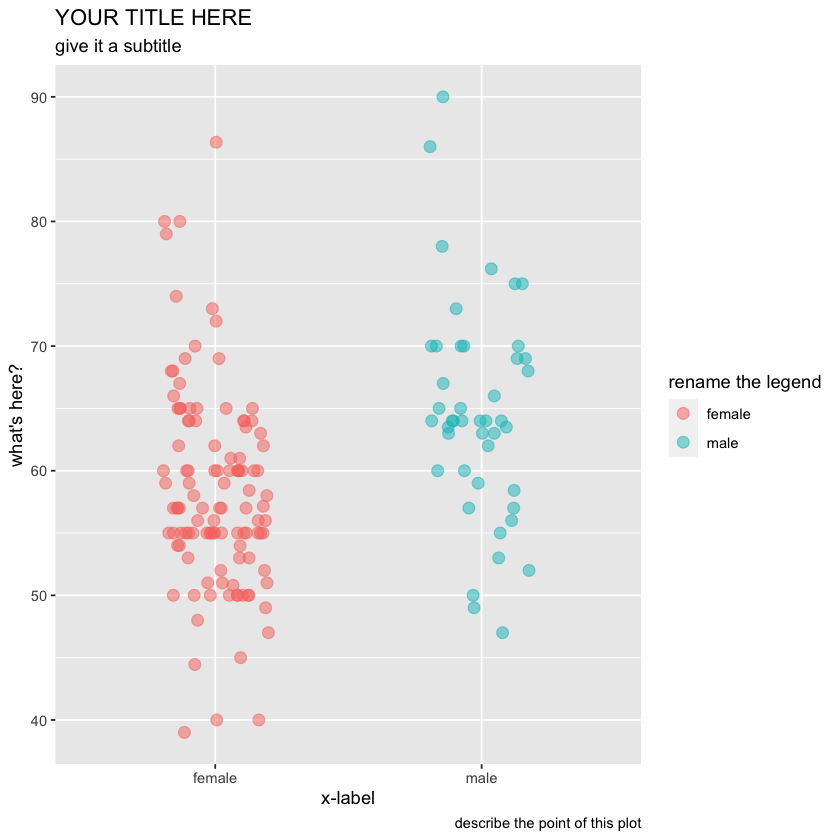

In [79]:
gf_jitter(Thumb ~ Sex, data = fingers, width = 0.2, height = 0, color = ~ Sex, alpha = .5, size = 3) %>%
    gf_labs(.,
        title = "YOUR TITLE HERE",
        subtitle = "give it a subtitle",
        color = "rename the legend",
        x = "x-label",
        y = "what's here?",
        caption = "describe the point of this plot"
      )

## 7.4 Accomodating human readability 

### Colorblindness
Humans have both perceptual and cognitive features that can make some visualizations very difficult to understand. It’s always important to keep these in mind when building a visualization.

One important perceptual limitation that many people (8% of men and 0.5% of women) have is color blindness. This can make it very difficult to perceive the information in a figure where there is only color contrast between the elements but no brightness contrast. It is always helpful to use graph elements that differ substantially in brightness and/or texture, in addition to color. There are also “colorblind-friendly” palettes available for use with many visualization tools.

<img src="ch7-colorblind.jpg" width="650">

*What various colors look like to individuals with the two most common types of color blindness - it's good to choose contrasting colors that look different to everyone*

Remember when we changed the colors of our histogram with ```gf_refine()```? 

In [ ]:
gf_histogram(~ Thumb, data = fingers, fill = ~ Sex) %>%
    gf_refine(., scale_fill_manual(values = c("purple", "orange")))

The coloring function we applied to the histogram, ```scale_fill_manual()``` (or ```scale_color_manual()``` for outlines), isn't the only coloring function. The "manual" part of the name refers to the fact that you choose colors by their name ("purple" or "orange"), but it's restricted to just a few colors. There are a great many color packages that people have created to provide extra palettes to work with. Here are some gradients of example palettes:

<img src="ch7-colors.png" width="500">

The “rainbow” and “heat” color palettes are less perceptually uniform compared to the other color scales. If you were to make them grayscale, there would be several points along the gradient that are brighter than other points, rather than making a smooth transition from bright to dark to correspond with the hue transition. 

One of the most common alternative coloring packages is called ```viridis```. It has been optimized to be perceptually uniform and play friendly with color blindness. The whole package comes with four different color sets:

<img src="ch7-viridis.png" width="500">

When you install this package and load it into your library, it gives you access to some key functions:

- ```scale_color_viridis()```: Change the color of points, lines and texts
- ```scale_fill_viridis()```: Change the fill color of areas (box plot, bar plot, etc)
- ```viridis(n)```, ```magma(n)```, ```inferno(n)``` and ```plasma(n)```: Generate color palettes for base plot, where n is the number of colors to return.

Let's add this package, and then use ```viridis(5)``` to pick out 5 color values:

In [82]:
install.packages("viridis") #comment these commands out after the first time you use them so you 
library(viridis)            #don't have to spend time re-installing after the first use

viridis(5)

[1] "#440154FF" "#3B528BFF" "#21908CFF" "#5DC863FF" "#FDE725FF"

These don't seem like color names, what gives? Actually, they are - but named using the [hexadecimal color code system](https://www.pluralsight.com/blog/tutorials/understanding-hexadecimal-colors-simple). This code represents the amount of red, green, and blue in a color, as well as its brightness. Using the hex color code system gives you many more color options. Technically, you can use these codes in the place of "orange" or "purple" in ```scale_fill_manual()``` to give you access to all possible colors. However, that makes you put in effort to pick out specific colors and ensure their contrast is perceptually different enough. If you'd rather rely on someone else already having done that work, you can let these downloaded color palettes choose colors for you. 

Let's practice recoloring plots using ```viridis``` colors and functions. This function normally returns a continuous gradient of color, so whenever we have a categorical variable like ```Sex``` that we want to color, adding the argument ```discrete = TRUE``` will have the function pick out two specific colors to use. 

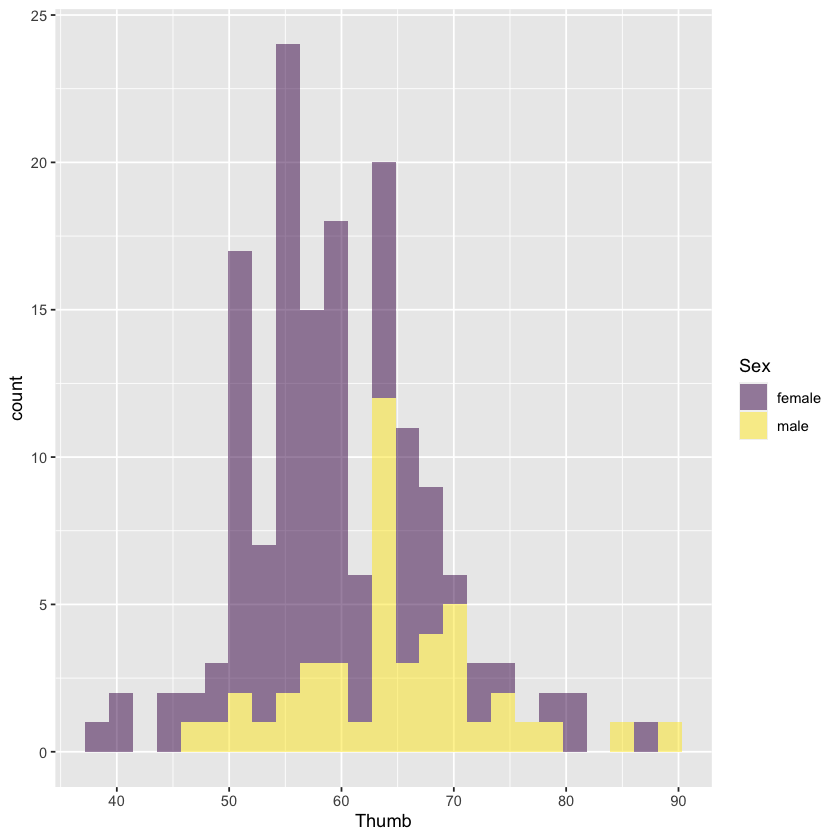

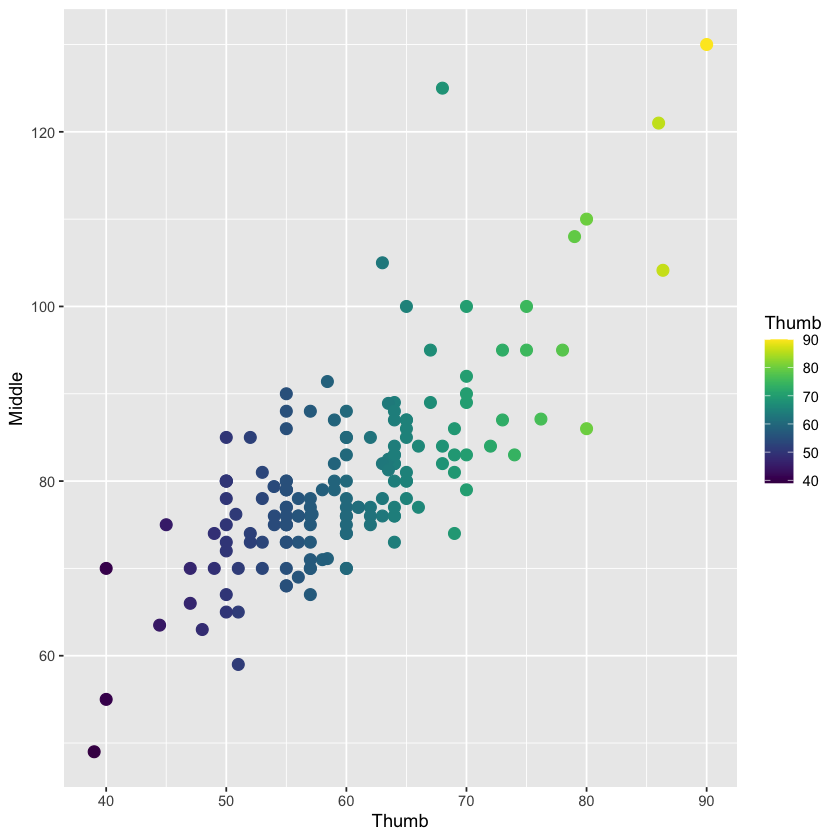

In [96]:
gf_histogram(~ Thumb, data = fingers, fill = ~ Sex) %>%
    gf_refine(., scale_fill_viridis(discrete=TRUE))

gf_point(Middle ~ Thumb, data = fingers, color = ~ Thumb, size = 3) %>%
    gf_refine(., scale_color_viridis(discrete=FALSE)) #FALSE is the default value, so not required to add it here

To use the other color palettes in the ```viridis``` package, add the ```option=``` argument with the palette name:

In [ ]:
gf_point(Middle ~ Thumb, data = fingers, color = ~ Thumb, size = 3) %>%
    gf_refine(., scale_color_viridis(discrete=FALSE, option="magma"))

If you'd rather choose among the color options yourself for discrete coloring, you can pair ```scale_fill_manual()``` with ```viridis()``` to generate a vector of color values:

[1] "#0D0887FF" "#7E03A8FF" "#CC4678FF" "#F89441FF" "#F0F921FF"


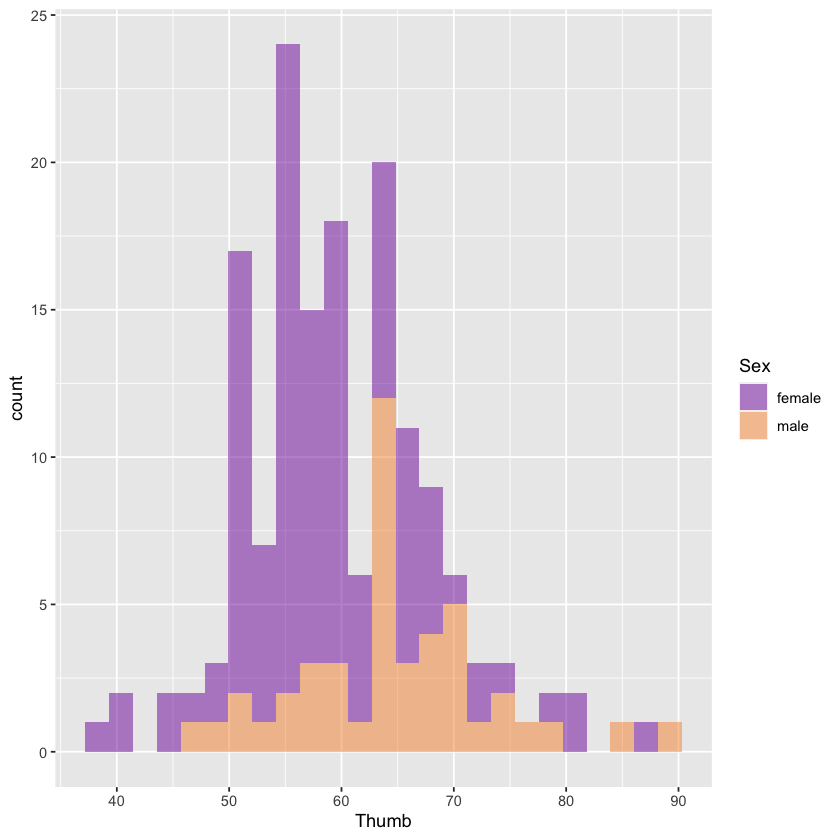

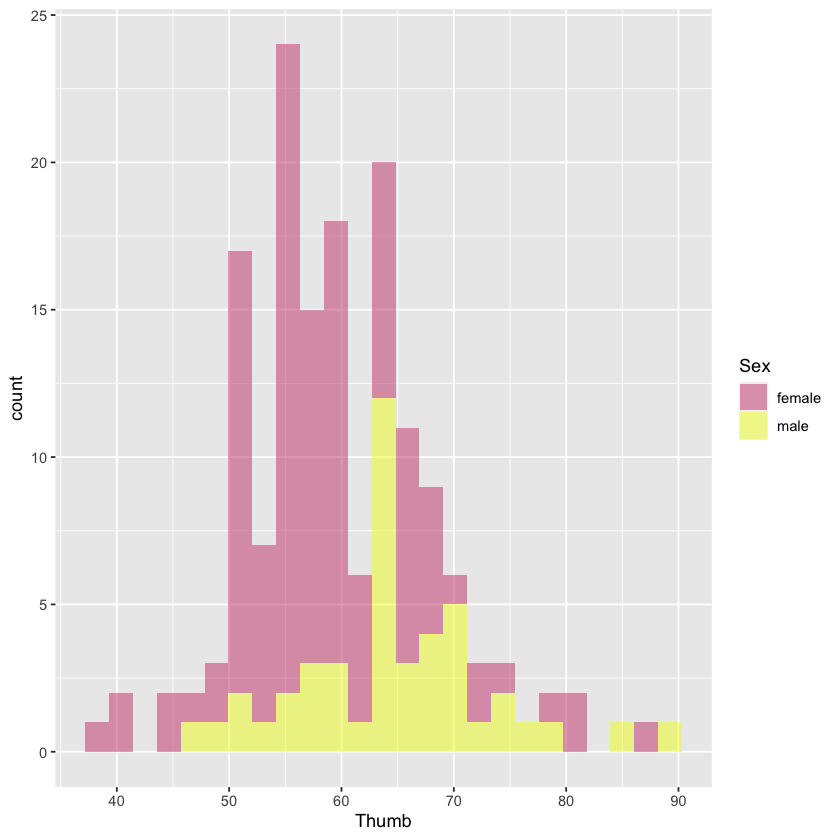

In [105]:
colorpalette <- viridis(5, option = "plasma")
print(colorpalette)

gf_histogram(~ Thumb, data = fingers, fill = ~ Sex) %>%
    gf_refine(., scale_fill_manual(values = c(color_choices[2], color_choices[4])))

gf_histogram(~ Thumb, data = fingers, fill = ~ Sex) %>%
    gf_refine(., scale_fill_manual(values = c(color_choices[3], color_choices[5])))

To know what the colors will look like ahead of time, you can paste the first 6 digits of the hex code into an online color picker tool [like this](https://wtools.io/color-picker).

For those intrepid designers who want even more color choices, the package ```RColorBrewer``` has many options:

<img src="ch7-colorbrewer.png" width="400">

The package contains 3 types of color palettes: sequential, qualitative, and diverging. Sequential palettes (first group in the image above) are suited to ordered data that progress from low to high (gradient). Qualitative palettes (second group of colors) are best suited to represent nominal or categorical data. They don't imply magnitude differences between groups. Diverging palettes (third group of colors) put equal emphasis on mid-range critical values and extremes at both ends of the data range.

```RColorBrewer``` gives you the functions ```scale_color_brewer()``` and ```scale_fill_brewer()``` to include in ```gf_refine()```. In addition, there are three helper functions to assist you in choosing your colors:

- ```brewer.pal(n, name)```: return the hex color code of the nth color in the \[name\] palette. 
- ```display.brewer.pal(n, name)```: Display the first n colors of the \[name\] palette.
- ```display.brewer.all()```: Display all color palette options. For displaying a subset, add the arguments ```type=``` (for showing only "div”, “qual”, or “seq” palettes) or ```colorblindFriendly=TRUE```. 

### Perceptual simplicity
Even for people with perfect color vision, there are perceptual limitations that can make some plots ineffective. This is one reason why statisticians never use pie charts: It can be very difficult for humans to accurately perceive differences in the volume of shapes. The pie chart below (presenting the same data on religious affiliation that we showed above) shows how tricky this can be.

<img src="ch7-piechart.png" width="500">

This plot is terrible for several reasons. First, it requires distinguishing a large number of colors from very small patches at the bottom of the figure. Second, the 3D perspective distorts the relative numbers, such that the pie wedge for Catholic appears much larger than the pie wedge for None, when in fact the number for None is slightly larger (22.8 vs 20.8 percent). Third, by separating the legend from the graphic, it requires the viewer to hold information in their working memory in order to map between the graphic and legend and to conduct many “table look-ups” in order to continuously match the legend labels to the visualization. And finally, it uses text that is far too small, making it impossible to read without zooming in.

Plotting the data using a more reasonable approach, we can see the pattern much more clearly. This plot may not look as flashy as the pie chart generated using Excel, but it’s a much more effective and accurate representation of the data.

<img src="ch7-religionbars.png" width="800">

*Data obtained from [here](http://www.pewforum.org/religious-landscape-study/)*

This plot allows the viewer to make comparisons based on the the length of the bars along a common scale (the y-axis). Humans tend to be more accurate when decoding differences based on these perceptual elements than based on area or color.

## Chapter summary

After reading this chapter, you should be able to: 

- Explain the importance of good data visualization
- Describe the 5 basic rules of visualization
- Manipulate the color, size, and transparency of data in R plots
- Change axis labels and titles in R plots
- Choose plot elements based on how well they communicate your intended message

## Chapter quiz

## Lab

- Pick a new function from http://www.mosaic-web.org/ggformula/articles/pkgdown/ggformula-long.html that you haven't used yet: follow the directions there to make it. The change the attributes to better align with the data viz rules. 